### En este trabajo nos enfrentamos a un problema de clasificación. Tenemos un conjunto de datos de prediccion de diabetes, en el que contamos con los records de los pacientes y su condición de diabetes, categorizado como positivo a negativo. El record de los pacientes incluye  age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. Este dataset, basado en el historial medico y en el perfil demografico del paciente, resulta muy conveniente para desarrollar modelos de machine learning que ayuden a pronosticar los pacientes con alto riesgo de tener diabetes, de modo que esto ayude a anticipar un tratamiento médico adecuado.

### Importamos las librerias a utilizar

In [107]:
import joblib
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import os

from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


import sys
sys.path.append('../utils')  # Agrega la ruta a carpeta1

import bootcampviztools as bt


### Descargamos el dataset en formato csv del sitio web de Kaggle  
https://www.kaggle.com/code/danishmubashar/diabetes-hypertension-predict-acc-97/input

Hacemos un split del dataset en train y test y los guardamos en diferentes archivos csv:

In [ ]:
'''DATA_PATH = os.path.join("..", "data", "diabetes_prediction_dataset.csv")

from sklearn.model_selection import train_test_split

df_diabetes = pd.read_csv(DATA_PATH)
train, test = train_test_split(df_diabetes,test_size=0.2)
train.to_csv('diabetes_train.csv', sep='\t', encoding='utf-8')
test.to_csv('diabetes_test.csv', sep='\t', encoding='utf-8')'''

"\nfrom sklearn.model_selection import train_test_split\n\ntrain, test = train_test_split(df,test_size=0.2)\ntrain.to_csv('diabetes_train.csv', sep='\t', encoding='utf-8')\ntest.to_csv('diabetes_test.csv', sep='\t', encoding='utf-8')\n"

### Cargamos el dataset de train y lo exploramos

In [ ]:
DATA_PATH = '../data/diabetes_train.csv'
train_set = pd.read_csv(DATA_PATH, sep='\t') # Cargamos el dataset de train

In [ ]:
train_set.head() # Miramos la cabecera del dataset

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,55273,Male,43.0,0,0,No Info,26.43,4.8,140,0
1,1104,Male,23.0,0,0,No Info,31.59,5.8,159,0
2,4679,Female,28.0,0,0,never,42.67,4.0,159,0
3,1673,Female,69.0,0,0,former,25.33,6.5,200,1
4,25005,Female,51.0,0,0,never,21.63,4.0,145,0


In [ ]:
# Definimos la función para analizar las columnas del dataset: nombres de las columnas, tipos de datos, faltantes, y cardinalidad
def data_report(df):
    '''Esta funcion describe los campos de un dataframe de pandas de forma bastante clara, crack'''
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado.T

Con ayuda de la funcion analizamos las columnas a partir del data frame generado.  
Vemos la columna Unnamed:0 con cardinalidad maxima.  
Las demas columnas tienen cardinalidad alta y baja, lo que nos permite tipificarlas como numericas o categoricas.

In [59]:
data_report(train_set)

COL_N,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
DATA_TYPE,int64,object,float64,int64,int64,object,float64,float64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,80000,3,102,2,2,6,4097,18,18,2
CARDIN (%),100.0,0.0,0.13,0.0,0.0,0.01,5.12,0.02,0.02,0.0


### Definimos target y tipificamos

In [87]:
target = 'diabetes'

**Categoricas**

Vemos que es una variable categórica binaria:

In [92]:
train_set[target].unique()

array([0, 1], dtype=int64)

En base al analisis de las columnas las identificamos como categoricas o numericas según su cardinalidad.  
Decidimos catalogar como categoricas a las columnas con cardinalidad menor o igual a 6 (0.01%) y como numéricas a las mayores.

In [64]:
features_cat = ['gender','hypertension','heart_disease','smoking_history']

Observamos los valores unicos de las variables categoricas para confirmar su correcta tipificación.  
Observamos que hay tanto binarias como multiclase:

In [85]:
for col in features_cat:
    print(col)
    print(train_set[col].unique())
    print('\n')
 

gender
['Male' 'Female' 'Other']


hypertension
[0 1]


heart_disease
[0 1]


smoking_history
['No Info' 'never' 'former' 'current' 'not current' 'ever']




**Numericas**

Definimos las variables numéricas, y vemos que hay tanto discretas como continuas.  
Age, HbA1c_level y blood_glucose_level son discretas y bmi es continua, como indica su cardinalidad.

In [81]:
features_num = ['age','bmi','HbA1c_level','blood_glucose_level']

### Mini EDA

Categóricas vs target categorica

Generamos las graficas usando una funcion de visualizacion del codigo externo bootcampviztools.py  
Nos quedamos con todas las categoricas porque vemos claramente que tener la proporcion diabetes-no_diabetes varía dependiendo la etiqueta de las variables categóricas.

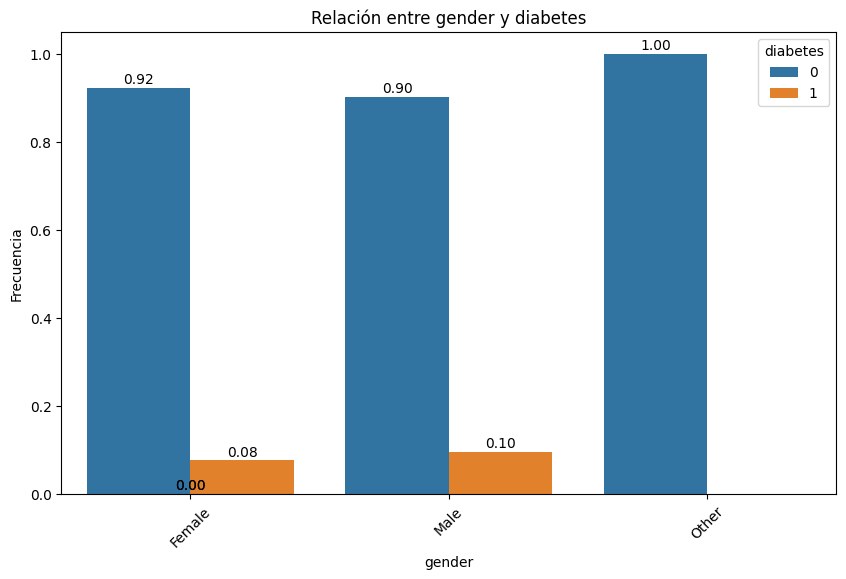

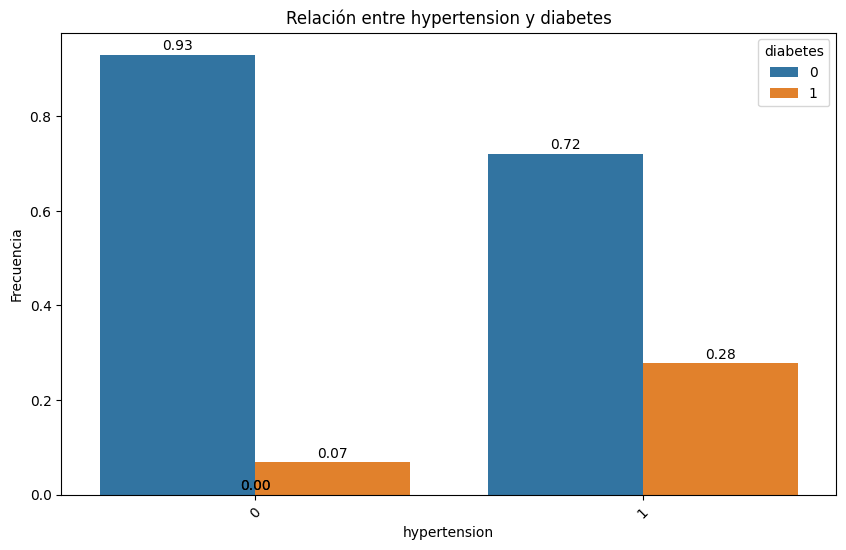

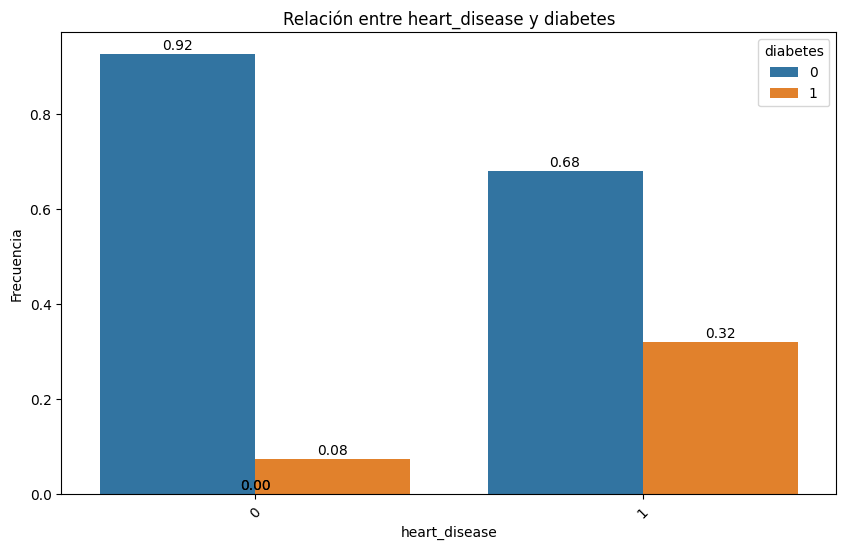

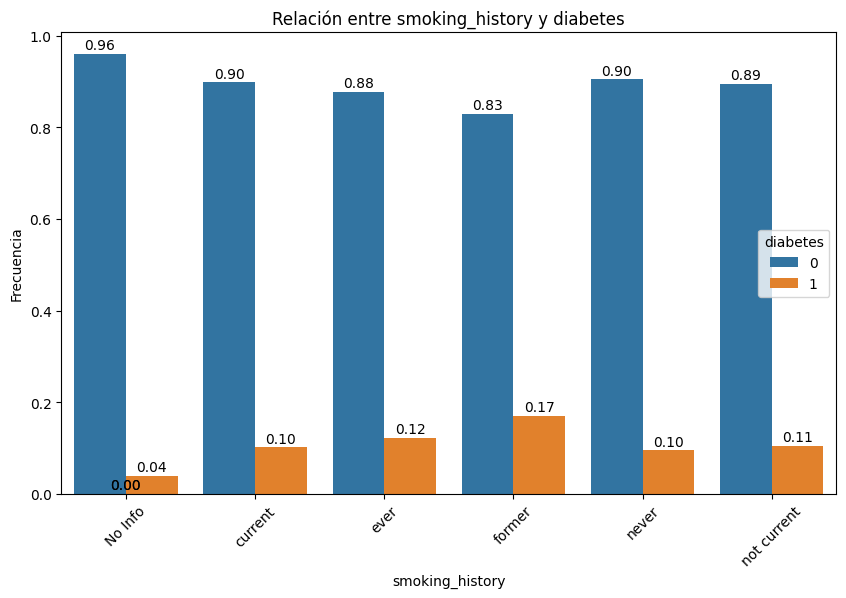

In [114]:
for col_cat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, col_cat, target,relative_freq=True, show_values=True, size_group = 6)

Numericas vs target categórica

Hago un análisis bivariante usando un pairplot.  
En las gráficas de la diagonal observamos la distribución de las columnas numéricas en las dos clases de nuestra variable objetivo.  
Nos quedamos con todas las variables numericas porque claramente vemos que en todas se discrimina la variable objetivo.

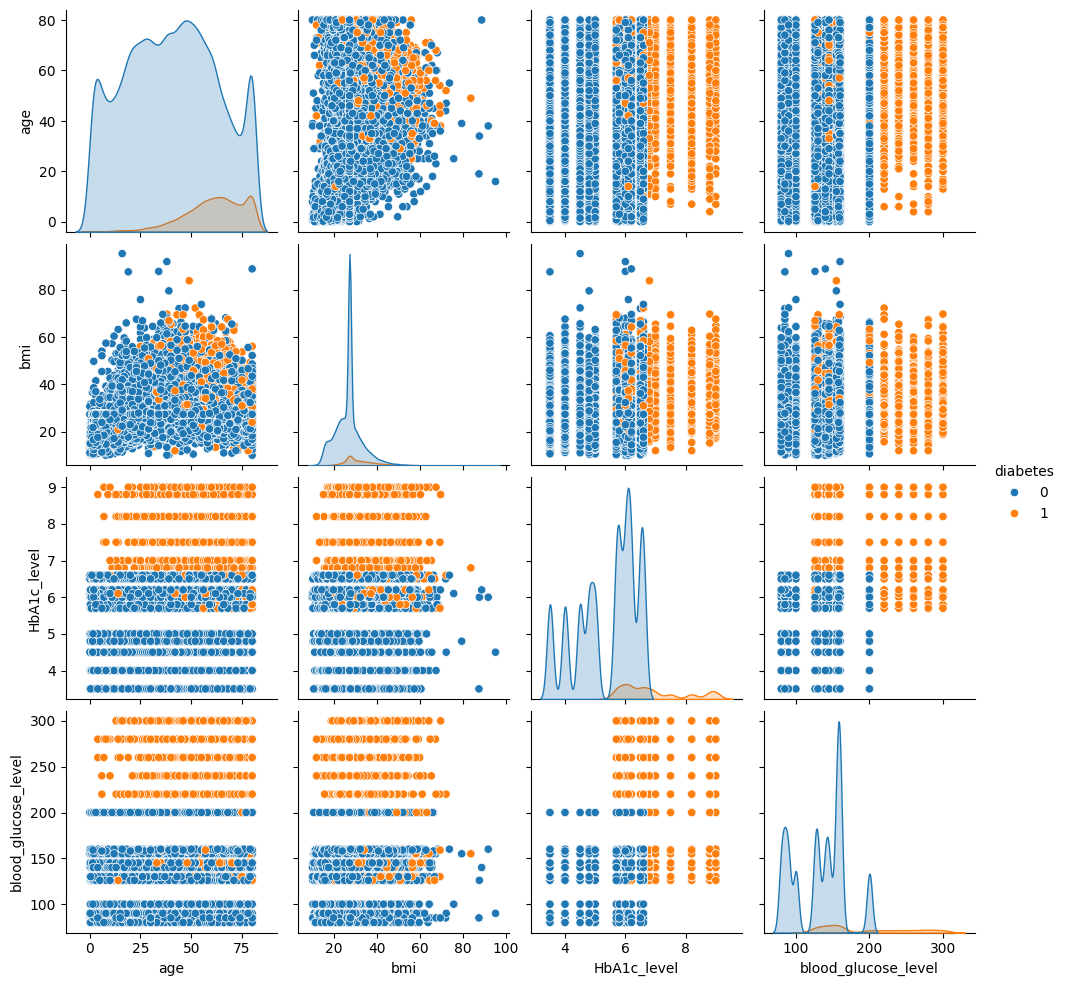

In [ ]:
sns.pairplot(train_set.drop(features_cat,axis=1).drop('Unnamed: 0',axis=1), hue = "diabetes");

### Limpieza inicial

Nos apuntamos las columnas que son identificadores unicos para descartarlos posteriormente.

In [106]:
columns_to_exclude = ["Unnamed: 0"]

### Construyendo Pipelines. Exclusion de columnas

### Imputamos valores faltantes

### Codificación de Variables Categóricas (OneHotEnconder vs OrdinalEncoder)

### Numericas. Transformación y escalado

### Procesado con pipelines

In [ ]:
'''# Modo Pipeline

cat_pipeline = Pipeline(
    [("Impute_Mode", SimpleImputer(strategy = "most_frequent")),
     ("OHEncoder", OneHotEncoder())
    ]
)

num_pipeline = Pipeline(
    [("Impute_Mean", SimpleImputer(strategy = "mean")),
     ("SScaler", StandardScaler())
    ]
)

preprocessing = ColumnTransformer(
    [("Process_Numeric", num_pipeline, ["Age","Fare"]),
     ("Process_Categorical", cat_pipeline, ["Sex","Embarked","Pclass"]),
     ("Exclude", "drop", columns_to_exclude)
    ], remainder = "passthrough")
'''

In [ ]:
#pipe_train = preprocessing.fit_transform(train)
#pipe_train

In [ ]:
#df_pipe_train = pd.DataFrame(pipe_train, columns = preprocessing.get_feature_names_out())
#df_pipe_train

In [ ]:
#df_pipe_train.head()

### Importante, creamos y_train

In [ ]:
y_train = train_set[target]

### Modelado y optimización de hiperparámetros con grid

### Grabamos el mejor modelo